#### 최종 목표 : 퇴근 시간 (18~20시)의 버스 승차 인원 예측하기

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
bus_df = pd.read_csv("C:/Class/MLproject/bus_bts.csv")
test = pd.read_csv("C:/Class/MLproject/test.csv")
train = pd.read_csv("C:/Class/MLproject/train.csv")

In [4]:
bus_df.head()

,user_card_id,bus_route_id,vhc_id,geton_date,geton_time,geton_station_code,geton_station_name,getoff_date,getoff_time,getoff_station_code,getoff_station_name,user_category,user_count
0,1.010010e+15,23000000,149793674,2019-09-10,06:34:45,360,노형오거리,2019-09-10,07:10:31,592.0,화북초등학교,1,1
1,1.010010e+15,23000000,149793674,2019-09-10,06:34:58,360,노형오거리,2019-09-10,06:56:27,3273.0,고산동산(광양방면),1,1
2,1.019160e+15,21420000,149793535,2019-09-10,07:19:07,2495,동광환승정류장4(제주방면),2019-09-10,07:40:29,431.0,정존마을,4,1
3,1.019150e+15,21420000,149793512,2019-09-09,09:14:47,3282,대정환승정류장(대정읍사무소),2019-09-09,10:02:46,431.0,정존마을,1,1
4,1.010010e+15,21420000,149793512,2019-09-09,09:28:53,2820,삼정지에듀,2019-09-09,10:21:37,2972.0,제주국제공항(종점),4,1


In [5]:
train.head()

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,6~7_ride,7~8_ride,...,9~10_ride,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff,18~20_ride
0,0,2019-09-01,4270000,시외,344,제주썬호텔,33.48990,126.49373,0.0,1.0,...,5.0,2.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2019-09-01,4270000,시외,357,한라병원,33.48944,126.48508,1.0,4.0,...,2.0,5.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
2,2,2019-09-01,4270000,시외,432,정존마을,33.48181,126.47352,1.0,1.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,3,2019-09-01,4270000,시내,1579,제주국제공항(600번),33.50577,126.49252,0.0,17.0,...,26.0,14.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0
4,4,2019-09-01,4270000,시내,1646,중문관광단지입구,33.25579,126.41260,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [6]:
train.columns

Index(['id', 'date', 'bus_route_id', 'in_out', 'station_code', 'station_name',
       'latitude', 'longitude', '6~7_ride', '7~8_ride', '8~9_ride',
       '9~10_ride', '10~11_ride', '11~12_ride', '6~7_takeoff', '7~8_takeoff',
       '8~9_takeoff', '9~10_takeoff', '10~11_takeoff', '11~12_takeoff',
       '18~20_ride'],
      dtype='object')

In [7]:
test.head() #test 데이터셋에는 18~20 ride없음

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,6~7_ride,7~8_ride,8~9_ride,9~10_ride,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff
0,415423,2019-10-01,4270000,시외,344,제주썬호텔,33.48990,126.49373,4.0,4.0,7.0,2.0,9.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,415424,2019-10-01,4270000,시외,357,한라병원,33.48944,126.48508,1.0,6.0,6.0,1.0,8.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0
2,415425,2019-10-01,4270000,시외,432,정존마을,33.48181,126.47352,2.0,4.0,2.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,415426,2019-10-01,4270000,시내,1579,제주국제공항(600번),33.50577,126.49252,1.0,11.0,18.0,8.0,26.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0
4,415427,2019-10-01,4270000,시내,1636,롯데호텔,33.24872,126.41032,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [8]:
# 각 데이터셋의 행 / 열 개수

bus_df.shape  # (2409414,13)
train.shape   # (415423, 21)
test.shape    # (228170, 20)

(228170, 20)

In [9]:
train.describe()

,id,bus_route_id,station_code,latitude,longitude,6~7_ride,7~8_ride,8~9_ride,9~10_ride,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff,18~20_ride
count,415423.000000,4.154230e+05,4.154230e+05,415423.000000,415423.000000,415423.000000,415423.000000,415423.000000,415423.000000,415423.000000,415423.000000,415423.000000,415423.000000,415423.000000,415423.000000,415423.000000,415423.000000,415423.000000
mean,207711.000000,2.691935e+07,4.209311e+04,33.420375,126.533574,0.305893,0.829699,0.815350,0.642475,0.599618,0.579393,0.112870,0.344870,0.516481,0.430922,0.408001,0.402874,1.242095
std,119922.434776,3.924652e+06,4.971504e+05,0.107996,0.140986,1.109766,2.255116,2.317561,1.959844,1.885941,1.942137,0.597714,1.279179,1.658850,1.485124,1.412839,1.446080,4.722287
min,0.000000,4.270000e+06,1.000000e+00,33.208350,126.165040,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,103855.500000,2.346000e+07,3.200000e+02,33.291080,126.475780,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,207711.000000,2.803000e+07,1.130000e+03,33.478850,126.529770,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,311566.500000,3.003000e+07,2.226000e+03,33.500020,126.575890,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,415422.000000,3.282000e+07,6.115101e+06,33.963640,126.965670,85.000000,94.000000,136.000000,78.000000,124.000000,99.000000,45.000000,66.000000,59.000000,65.000000,52.000000,81.000000,272.000000


In [10]:
test.describe()

,id,bus_route_id,station_code,latitude,longitude,6~7_ride,7~8_ride,8~9_ride,9~10_ride,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff
count,228170.000000,2.281700e+05,2.281700e+05,228170.000000,228170.000000,228170.000000,228170.000000,228170.000000,228170.000000,228170.000000,228170.000000,228170.000000,228170.000000,228170.000000,228170.000000,228170.000000,228170.00000
mean,529507.500000,2.693348e+07,4.268922e+04,33.419553,126.533662,0.299268,0.786453,0.813990,0.671933,0.629101,0.619582,0.112057,0.336284,0.519503,0.452513,0.434606,0.43571
std,65867.149798,3.920495e+06,5.006822e+05,0.108004,0.141534,1.086878,2.139540,2.262655,2.046359,1.923265,2.028462,0.586951,1.271613,1.665510,1.541363,1.474626,1.53080
min,415423.000000,4.270000e+06,0.000000e+00,33.208350,126.165040,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,472465.250000,2.346000e+07,3.200000e+02,33.289190,126.475160,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,529507.500000,2.804000e+07,1.141000e+03,33.478330,126.529840,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,586549.750000,3.003000e+07,2.236000e+03,33.499970,126.576320,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,643592.000000,3.282000e+07,6.115101e+06,33.963640,126.965670,45.000000,100.000000,106.000000,119.000000,69.000000,102.000000,37.000000,64.000000,47.000000,71.000000,55.000000,56.00000


In [11]:
bus_df.isnull().sum() # bus_df 데이터셋의 getoff ~ 결측치 : 버스에서 하차 시 버스카드 찍지 않은 경우인 듯

user_card_id                0
bus_route_id                0
vhc_id                      0
geton_date                  0
geton_time                  0
geton_station_code          0
geton_station_name         49
getoff_date            895736
getoff_time            895736
getoff_station_code    895736
getoff_station_name    895775
user_category               0
user_count                  0
dtype: int64

In [12]:
train.isnull().sum()  # train 데이터셋에 결측치 없음

id               0
date             0
bus_route_id     0
in_out           0
station_code     0
station_name     0
latitude         0
longitude        0
6~7_ride         0
7~8_ride         0
8~9_ride         0
9~10_ride        0
10~11_ride       0
11~12_ride       0
6~7_takeoff      0
7~8_takeoff      0
8~9_takeoff      0
9~10_takeoff     0
10~11_takeoff    0
11~12_takeoff    0
18~20_ride       0
dtype: int64

In [13]:
test.isnull().sum()  # train 데이터셋에 결측치 없음

id               0
date             0
bus_route_id     0
in_out           0
station_code     0
station_name     0
latitude         0
longitude        0
6~7_ride         0
7~8_ride         0
8~9_ride         0
9~10_ride        0
10~11_ride       0
11~12_ride       0
6~7_takeoff      0
7~8_takeoff      0
8~9_takeoff      0
9~10_takeoff     0
10~11_takeoff    0
11~12_takeoff    0
dtype: int64

In [14]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 415423 entries, 0 to 415422
Data columns (total 21 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             415423 non-null  int64  
 1   date           415423 non-null  object 
 2   bus_route_id   415423 non-null  int64  
 3   in_out         415423 non-null  object 
 4   station_code   415423 non-null  int64  
 5   station_name   415423 non-null  object 
 6   latitude       415423 non-null  float64
 7   longitude      415423 non-null  float64
 8   6~7_ride       415423 non-null  float64
 9   7~8_ride       415423 non-null  float64
 10  8~9_ride       415423 non-null  float64
 11  9~10_ride      415423 non-null  float64
 12  10~11_ride     415423 non-null  float64
 13  11~12_ride     415423 non-null  float64
 14  6~7_takeoff    415423 non-null  float64
 15  7~8_takeoff    415423 non-null  float64
 16  8~9_takeoff    415423 non-null  float64
 17  9~10_takeoff   415423 non-nul

C:\Users\KWAK\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='18~20_ride', ylabel='Density'>

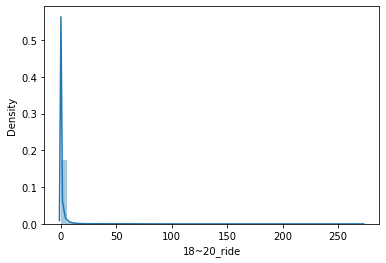

In [15]:
sns.distplot(train['18~20_ride']) # 퇴근 시간 승차 인원 분포 시각화 (0~1에 쏠려 있음)

In [16]:
train['18~20_ride'].value_counts()

0.0      296528
1.0       44268
2.0       23752
3.0       13560
4.0        8630
          ...  
272.0         1
143.0         1
215.0         1
227.0         1
106.0         1
Name: 18~20_ride, Length: 170, dtype: int64

In [17]:
ratio = pd.DataFrame(train['18~20_ride'].value_counts()).T
ratio

,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,146.0,209.0,125.0,149.0,102.0,272.0,143.0,215.0,227.0,106.0
18~20_ride,296528,44268,23752,13560,8630,5911,4291,3152,2288,1865,...,1,1,1,1,1,1,1,1,1,1


추가변수, 파생변수 생성 ....
요일 변수 만들어서 범주형으로 > 요일별 승차 인원 파악해보기 

In [18]:
train['date'] = pd.to_datetime(train['date'])
train.head()

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,6~7_ride,7~8_ride,...,9~10_ride,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff,18~20_ride
0,0,2019-09-01,4270000,시외,344,제주썬호텔,33.48990,126.49373,0.0,1.0,...,5.0,2.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2019-09-01,4270000,시외,357,한라병원,33.48944,126.48508,1.0,4.0,...,2.0,5.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
2,2,2019-09-01,4270000,시외,432,정존마을,33.48181,126.47352,1.0,1.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,3,2019-09-01,4270000,시내,1579,제주국제공항(600번),33.50577,126.49252,0.0,17.0,...,26.0,14.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0
4,4,2019-09-01,4270000,시내,1646,중문관광단지입구,33.25579,126.41260,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [19]:
train['date'].value_counts() # train 데이터셋은 09/01 ~ 09/30

2019-09-19    16030
2019-09-10    16005
2019-09-24    15968
2019-09-17    15960
2019-09-30    15884
2019-09-26    15870
2019-09-25    15863
2019-09-20    15827
2019-09-27    15808
2019-09-18    15767
2019-09-05    15706
2019-09-16    15687
2019-09-23    15624
2019-09-03    15485
2019-09-11    15415
2019-09-06    15352
2019-09-09    15297
2019-09-02    14960
2019-09-04    14739
2019-09-28    13219
2019-09-29    12124
2019-09-08    11582
2019-09-01    11538
2019-09-21    11534
2019-09-12    11375
2019-09-15    11209
2019-09-14    10636
2019-09-07    10198
2019-09-13     8708
2019-09-22     6053
Name: date, dtype: int64

In [20]:
from datetime import date as dt
train['dayname'] = train['date'].dt.day_name()
train

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,6~7_ride,7~8_ride,...,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff,18~20_ride,dayname
0,0,2019-09-01,4270000,시외,344,제주썬호텔,33.48990,126.49373,0.0,1.0,...,2.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sunday
1,1,2019-09-01,4270000,시외,357,한라병원,33.48944,126.48508,1.0,4.0,...,5.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,Sunday
2,2,2019-09-01,4270000,시외,432,정존마을,33.48181,126.47352,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,Sunday
3,3,2019-09-01,4270000,시내,1579,제주국제공항(600번),33.50577,126.49252,0.0,17.0,...,14.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0,Sunday
4,4,2019-09-01,4270000,시내,1646,중문관광단지입구,33.25579,126.41260,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415418,415418,2019-09-30,32820000,시내,1129,한림환승정류장(한림리),33.41437,126.26336,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Monday
415419,415419,2019-09-30,32820000,시내,1564,제주시외버스터미널,33.49946,126.51479,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Monday
415420,415420,2019-09-30,32820000,시내,2322,해병부대,33.23100,126.26273,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Monday
415421,415421,2019-09-30,32820000,시내,3291,애월환승정류장(애월리),33.46483,126.31870,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Monday


In [21]:
ratio2 = pd.DataFrame(train['dayname'].value_counts()).T
ratio2

,Monday,Tuesday,Wednesday,Thursday,Friday,Sunday,Saturday
dayname,77452,63418,61784,58981,55695,52506,45587


<AxesSubplot:>

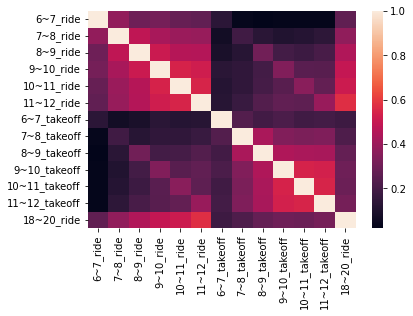

In [22]:
train_ = train[['6~7_ride', '7~8_ride', '8~9_ride',
       '9~10_ride', '10~11_ride', '11~12_ride', '6~7_takeoff', '7~8_takeoff',
       '8~9_takeoff', '9~10_takeoff', '10~11_takeoff', '11~12_takeoff',
       '18~20_ride']]
cor=train_.corr()
sns.heatmap(train_.corr())

### 강수량 데이터

In [23]:
rain_df = pd.read_csv("C:/Class/MLproject/OBS_ASOS_TIM_20230111115410.csv",encoding = "cp949")
rain_df.fillna(0) # 강수량이 0인 행도 있는데 .. 결측치 = 0 해도 되겠지 ..? 

,지점,지점명,일시,강수량(mm),강수량 QC플래그
0,184,제주,2019-09-01 07:00,0.0,0.0
1,184,제주,2019-09-01 08:00,0.0,0.0
2,184,제주,2019-09-01 09:00,0.0,0.0
3,184,제주,2019-09-01 10:00,0.0,9.0
4,184,제주,2019-09-01 11:00,0.0,9.0
...,...,...,...,...,...
1347,189,서귀포,2019-09-30 19:00,2.5,0.0
1348,189,서귀포,2019-09-30 20:00,0.2,0.0
1349,189,서귀포,2019-09-30 21:00,0.0,0.0
1350,189,서귀포,2019-09-30 22:00,1.9,0.0


In [24]:
rain_jeju = rain_df[rain_df["지점명"]=="제주"]
rain_seogwipo = rain_df[rain_df["지점명"]=="서귀포"]
rain_gosan = rain_df[rain_df["지점명"]=="고산"]
rain_seongsan = rain_df[rain_df["지점명"]=="성산"]

In [25]:
rain_jeju['date'] = pd.to_datetime(rain_jeju['일시'])
rain_jeju['day'] = rain_jeju['date'].dt.day

rain_seogwipo['date'] = pd.to_datetime(rain_seogwipo['일시'])
rain_seogwipo['day'] = rain_seogwipo['date'].dt.day

rain_gosan['date'] = pd.to_datetime(rain_gosan['일시'])
rain_gosan['day'] = rain_gosan['date'].dt.day

rain_seongsan['date'] = pd.to_datetime(rain_seongsan['일시'])
rain_seongsan['day'] = rain_seongsan['date'].dt.day
rain_seongsan

C:\Users\KWAK\anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


,지점,지점명,일시,강수량(mm),강수량 QC플래그,date,day
733,188,성산,2019-09-01 14:00,1.1,NaN,2019-09-01 14:00:00,1
734,188,성산,2019-09-01 15:00,4.5,NaN,2019-09-01 15:00:00,1
735,188,성산,2019-09-01 16:00,1.4,NaN,2019-09-01 16:00:00,1
736,188,성산,2019-09-01 17:00,0.1,NaN,2019-09-01 17:00:00,1
737,188,성산,2019-09-01 18:00,0.0,NaN,2019-09-01 18:00:00,1
...,...,...,...,...,...,...,...
1023,188,성산,2019-09-30 19:00,1.0,NaN,2019-09-30 19:00:00,30
1024,188,성산,2019-09-30 20:00,0.1,NaN,2019-09-30 20:00:00,30
1025,188,성산,2019-09-30 21:00,0.2,NaN,2019-09-30 21:00:00,30
1026,188,성산,2019-09-30 22:00,1.7,NaN,2019-09-30 22:00:00,30


In [26]:
jeju_sum = rain_jeju.groupby('day')['강수량(mm)'].sum().reset_index()
seogwipo_sum = rain_seogwipo.groupby('day')['강수량(mm)'].sum().reset_index()
gosan_sum = rain_gosan.groupby('day')['강수량(mm)'].sum().reset_index()
seongsan_sum = rain_seongsan.groupby('day')['강수량(mm)'].sum().reset_index()

# 제주도 강수량 데이터 (rain_jeju)
for i in range(1,31):
    if i not in list(jeju_sum['day']):
        jeju_sum.loc[len(jeju_sum)] = [i,0] # 결측치들을 비 안 온 걸로 간주해도 될까 ..?

rain_jeju = jeju_sum.sort_values(["day"], ascending = [True])
rain_jeju = rain_jeju.assign(date = pd.date_range("2019-09-01", "2019-09-30", freq="D"))
rain_jeju = rain_jeju.drop(['day'],axis = 1)

# 서귀포 강수량 데이터 (rain_seogwipo)
for i in range(1,31):
    if i not in list(seogwipo_sum['day']):
        seogwipo_sum.loc[len(seogwipo_sum)] = [i,0]

rain_seogwipo = seogwipo_sum.sort_values(["day"], ascending = [True])
rain_seogwipo = rain_seogwipo.assign(date = pd.date_range("2019-09-01", "2019-09-30", freq="D"))
rain_seogwipo = rain_seogwipo.drop(['day'],axis = 1)

# 고산 강수량 데이터 (rain_gosan)
for i in range(1,31):
    if i not in list(gosan_sum['day']):
        gosan_sum.loc[len(gosan_sum)] = [i,0]

rain_gosan = gosan_sum.sort_values(["day"], ascending = [True])
rain_gosan = rain_gosan.assign(date = pd.date_range("2019-09-01", "2019-09-30", freq="D"))
rain_gosan = rain_gosan.drop(['day'],axis = 1)

# 성산 강수량 데이터 (rain_seongsan)
for i in range(1,31):
    if i not in list(seongsan_sum['day']):
        seongsan_sum.loc[len(seongsan_sum)] = [i,0]

rain_seongsan = seongsan_sum.sort_values(["day"], ascending = [True])
rain_seongsan = rain_seongsan.assign(date = pd.date_range("2019-09-01", "2019-09-30", freq="D"))
rain_seongsan = rain_seongsan.drop(['day'],axis = 1)

In [27]:
rain_jeju

,강수량(mm),date
0,25.0,2019-09-01
1,26.8,2019-09-02
2,13.9,2019-09-03
3,43.0,2019-09-04
4,7.0,2019-09-05
5,58.6,2019-09-06
6,44.5,2019-09-07
7,19.0,2019-09-08
8,24.7,2019-09-09
9,0.0,2019-09-10


#### 강수량에 따라 범주형으로 구분하기
비 X  
약한 비 : 1시간에 3㎜ 미만  > (24시간 기준?) 누적 강수량 7.2  
(보통) 비 : 1시간에 3∼15㎜  > 누적 강수량 7.2 ~ 36  
강한 비 : 1시간에 15㎜ 이상  > 누적 강수량 36 이상   

In [28]:
rain_class = []

for i in range(30):
    if (rain_jeju.iloc[i,0] == 0):
        rain_class.append(0)
    elif (rain_jeju.iloc[i,0] > 0) & (rain_jeju.iloc[i,0] <= 7.2):
        rain_class.append(1)
    elif (rain_jeju.iloc[i,0] > 7.2) & (rain_jeju.iloc[i,0] <= 36):
        rain_class.append(2)
    elif (rain_jeju.iloc[i,0] > 36):
        rain_class.append(3)

rain_jeju["rain_class"] = rain_class

rain_class2 = []

for i in range(30):
    if (rain_seogwipo.iloc[i,0] == 0):
        rain_class2.append(0)
    elif (rain_seogwipo.iloc[i,0] > 0) & (rain_seogwipo.iloc[i,0] <= 7.2):
        rain_class2.append(1)
    elif (rain_seogwipo.iloc[i,0] > 7.2) & (rain_seogwipo.iloc[i,0] <= 36):
        rain_class2.append(2)
    elif (rain_seogwipo.iloc[i,0] > 36):
        rain_class2.append(3)

rain_seogwipo["rain_class"] = rain_class2

rain_class3 = [] 

for i in range(30):
    if (rain_gosan.iloc[i,0] == 0):
        rain_class3.append(0)
    elif (rain_gosan.iloc[i,0] > 0) & (rain_gosan.iloc[i,0] <= 7.2):
        rain_class3.append(1)
    elif (rain_gosan.iloc[i,0] > 7.2) & (rain_gosan.iloc[i,0] <= 36):
        rain_class3.append(2)
    elif (rain_gosan.iloc[i,0] > 36):
        rain_class3.append(3)
        
rain_gosan["rain_class"] = rain_class3

rain_class4 = []

for i in range(30):
    if (rain_seongsan.iloc[i,0] == 0):
        rain_class4.append(0)
    elif (rain_seongsan.iloc[i,0] > 0) & (rain_seongsan.iloc[i,0] <= 7.2):
        rain_class4.append(1)
    elif (rain_seongsan.iloc[i,0] > 7.2) & (rain_seongsan.iloc[i,0] <= 36):
        rain_class4.append(2)
    elif (rain_seongsan.iloc[i,0] > 36):
        rain_class4.append(3)
        
rain_seongsan["rain_class"] = rain_class4

In [29]:
rain_jeju

,강수량(mm),date,rain_class
0,25.0,2019-09-01,2
1,26.8,2019-09-02,2
2,13.9,2019-09-03,2
3,43.0,2019-09-04,3
4,7.0,2019-09-05,1
5,58.6,2019-09-06,3
6,44.5,2019-09-07,3
7,19.0,2019-09-08,2
8,24.7,2019-09-09,2
9,0.0,2019-09-10,0


In [69]:
rains = pd.merge(rain_jeju, rain_seogwipo, on='date')
rains = pd.merge(rains, rain_gosan, on = 'date')
rains = pd.merge(rains, rain_seongsan, on = 'date')
rains = rains.drop(['강수량(mm)_x','강수량(mm)_y'],axis =1)
rains.columns = ['date','jeju(n)','seogwipo(s)','gosan(w)','seongsan(e)']
rains["other(o)"] = [int(round(sum(rains.iloc[i][1:])/4,1)) for i in range(30)]
rains

C:\Users\KWAK\AppData\Local\Temp\ipykernel_11604\1638485428.py:3: FutureWarning: Passing 'suffixes' which cause duplicate columns {'rain_class_x', '강수량(mm)_x'} in the result is deprecated and will raise a MergeError in a future version.
  rains = pd.merge(rains, rain_seongsan, on = 'date')


,date,jeju(n),seogwipo(s),gosan(w),seongsan(e),other(o)
0,2019-09-01,2,2,2,2,2
1,2019-09-02,2,2,3,2,2
2,2019-09-03,2,2,3,2,2
3,2019-09-04,3,2,3,2,2
4,2019-09-05,1,2,0,3,1
5,2019-09-06,3,3,2,3,2
6,2019-09-07,3,2,2,1,2
7,2019-09-08,2,2,2,2,2
8,2019-09-09,2,2,3,1,2
9,2019-09-10,0,0,0,0,0


### 지역변수 만들기
지역 변수 기준  
서부(w) : longitude <= 126.35, latitude < 33.5  
남부(s) : 126.35 < longitude < 126.725, latitude < 33.32  
동부(e) : longitude >= 126.75  
북부(n) : 126.35 < longitude < 126.725, latitude > 33.42  
기타(o) : 그 외

In [33]:
region_class= []

for i in range (len(train)):
    if ((train["longitude"][i].item() <= 126.35) & (train["latitude"][i].item() < 33.5)):
        region_class.append('w')
    elif ((train["longitude"][i].item() > 126.35) & (train["longitude"][i].item() < 126.725) & (train["latitude"][i].item() < 33.32)):
        region_class.append('s')
    elif ((train["longitude"][i].item() >= 126.75)):
        region_class.append('e')
    elif ((train["longitude"][i].item() > 126.35) & (train["longitude"][i].item() < 126.725) & (train["latitude"][i].item() > 33.42)):
        region_class.append('n')
    else:
        region_class.append('o')

train['region'] = region_class

In [38]:
len(train)

415423

제주 - 북쪽, 서귀포 - 남쪽, 고산 - 서쪽, 성산 - 동쪽 지역 변수에 맞춰서 각각의 날짜/ 지역별 강수량 변수 맵핑

In [64]:
train['rain'] = 0


for i in range(len(train)):
    for j in range(30):
        if train.iloc[i,1] == rains.iloc[j,0]:
            if train.iloc[i,22] == 'e':
                train.iloc[i,23] = rains.iloc[j,4]
            elif train.iloc[i,22] == 'w':
                train.iloc[i,23] = rains.iloc[j,3]
            elif train.iloc[i,22] == 's':
                train.iloc[i,23] = rains.iloc[j,2]
            elif train.iloc[i,22] == 'n':
                train.iloc[i,23] = rains.iloc[j,1]
            else:
                train.iloc[i,23] = rains.iloc[j,5]
 

In [65]:
train

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,6~7_ride,7~8_ride,...,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff,18~20_ride,dayname,region,rain
0,0,2019-09-01,4270000,시외,344,제주썬호텔,33.48990,126.49373,0.000000,0.693147,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,Sunday,n,2
1,1,2019-09-01,4270000,시외,357,한라병원,33.48944,126.48508,0.526589,1.609438,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,1.791759,Sunday,n,2
2,2,2019-09-01,4270000,시외,432,정존마을,33.48181,126.47352,0.526589,0.693147,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,1.098612,Sunday,n,2
3,3,2019-09-01,4270000,시내,1579,제주국제공항(600번),33.50577,126.49252,0.000000,2.890372,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,3.988984,Sunday,n,2
4,4,2019-09-01,4270000,시내,1646,중문관광단지입구,33.25579,126.41260,0.000000,0.000000,...,0.0,0.000000,0.000000,0.693147,0.0,0.0,0.000000,Sunday,s,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415418,415418,2019-09-30,32820000,시내,1129,한림환승정류장(한림리),33.41437,126.26336,0.959135,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,Monday,w,3
415419,415419,2019-09-30,32820000,시내,1564,제주시외버스터미널,33.49946,126.51479,0.959135,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,Monday,n,2
415420,415420,2019-09-30,32820000,시내,2322,해병부대,33.23100,126.26273,0.000000,0.000000,...,0.0,0.693147,0.000000,0.000000,0.0,0.0,0.000000,Monday,w,3
415421,415421,2019-09-30,32820000,시내,3291,애월환승정류장(애월리),33.46483,126.31870,0.526589,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,Monday,w,3


In [68]:
ride_takeoff = train.groupby(['date','region']).sum()
ride_takeoff = ride_takeoff.drop(["id","bus_route_id","station_code","latitude","longitude"], axis=1)
ride_takeoff['ride'] = 0
ride_takeoff['takeoff']=0

# 지역별 매일 오전 승차 인원 수
for i in range (len(ride_takeoff)):
    for j in range (6):
        ride_takeoff.iloc[i,14] += ride_takeoff.iloc[i,j]

# 지역별 매일 하차 인원 수 
for i in range (len(ride_takeoff)):
    for j in range (6,11):
        ride_takeoff.iloc[i,15] += ride_takeoff.iloc[i,j]

ride_takeoff

6~7_ride     7~8_ride     8~9_ride    9~10_ride  \
date       region                                                       
2019-09-01 e         42.211680   149.830794   183.390654   199.814869   
           n        732.665234  1544.608471  1876.345894  1947.860037   
           o          5.858152    16.465633    22.416276    24.143497   
           s        174.439482   395.622874   502.150325   529.904908   
           w         62.466559   150.037061   198.580240   221.377770   
...                        ...          ...          ...          ...   
2019-09-30 e        104.548113   429.880302   335.103640   315.258175   
           n       1182.876425  4310.302814  4080.498401  3176.637043   
           o         12.190297    57.910767    71.449417    48.874780   
           s        300.316685  1169.546889  1069.571356   800.048317   
           w        135.483968   500.524373   493.460493   314.359314   

                    10~11_ride   11~12_ride  6~7_takeoff  7~8_takeoff  \
date       region                                                       
2019-09-01 e        218.298433   196.899424    28.484701    80.249853   
           n       2086.630608  2076.197419   549.495483   989.052213   
           o         30.114759    34.488589     9.234057    23.263574   
           s        573.370591   506.238139   103.329977   230.309258   
           w        240.238467   222.206488    32.525801    97.225184   
...                        ...          ...          ...          ...   
2019-09-30 e        290.572796   241.488992    40.778785   175.670054   
           n       2865.215970  2615.997342   738.876560  2041.879579   
           o         43.396093    32.735148    10.150348    19.802292   
           s        740.764830   686.050511   163.955634   520.282042   
           w        290.692288   274.812677    55.452903   236.091106   

                   8~9_takeoff  9~10_takeoff  10~11_takeoff  11~12_takeoff  \
date       region                                                            
2019-09-01 e        111.547966    148.005268     150.094515     139.093980   
           n       1268.908544   1338.433480    1460.090509    1470.114399   
           o         35.741351     41.229371      43.585200      33.179484   
           s        323.067730    345.031584     384.467110     334.403380   
           w        142.035376    144.784436     158.256522     166.322501   
...                        ...           ...            ...            ...   
2019-09-30 e        197.443474    188.406160     243.951278     236.640090   
           n       2924.095164   2384.888067    2205.473367    2001.316358   
           o         40.463176     35.469418      39.835696      37.938576   
           s        735.874894    538.740084     557.788978     560.768822   
           w        332.133222    229.097850     231.725484     243.423245   

                    18~20_ride   rain          ride       takeoff  
date       region                                                  
2019-09-01 e        171.305278   1942    990.445853    518.382304  
           n       2715.283770  13750  10264.307663   5605.980229  
           o         36.470866    408    133.486906    153.053553  
           s        628.277325   4852   2681.726317   1386.205659  
           w        249.607190   2124   1094.906585    574.827319  
...                        ...    ...           ...           ...  
2019-09-30 e        259.368928   1412   1716.852018    846.249751  
           n       4393.602439  18206  18231.527995  10295.212738  
           o         35.258925    274    266.556502    145.720930  
           s        887.099482   3483   4766.298587   2516.641632  
           w        297.476816   4836   2009.333113   1084.500565  

[150 rows x 16 columns]

In [67]:
train.to_csv("C:/Class/MLproject/train2.csv")